My First notebook 

In [42]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [43]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
#data.dropna() dropps the null value rows and then inplace=True actually modifies it
data.dropna(inplace=True)

#data.info() is usefull as it displays the general info od the data set
data.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [60]:
#next we want to split the data here we use sklearn 
from sklearn.model_selection import train_test_split

# data.drop is to "drop" the col
# drop med hous val because we are trying to hide it, and drop ocean bs it is a word not numbers. 
x = data.drop(['median_house_value','ocean_proximity'],axis=1)
#like arrays, this data[] since we can pick and choose who which cols we want to acess. 
y = data['median_house_value']

In [61]:
# train_test_split() literally splits the data into the 4 variables.
# test_size=0.2 is VERY IMPORTANT as it sets apart the test data form the train data.
x_train,x_test,y_train,y_tes = train_test_split(x,y,test_size=0.2)

## how does the train_test_split() fucnion know which row should be split apart ? 
## What if we are trying to predict total rooms from price ? 


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

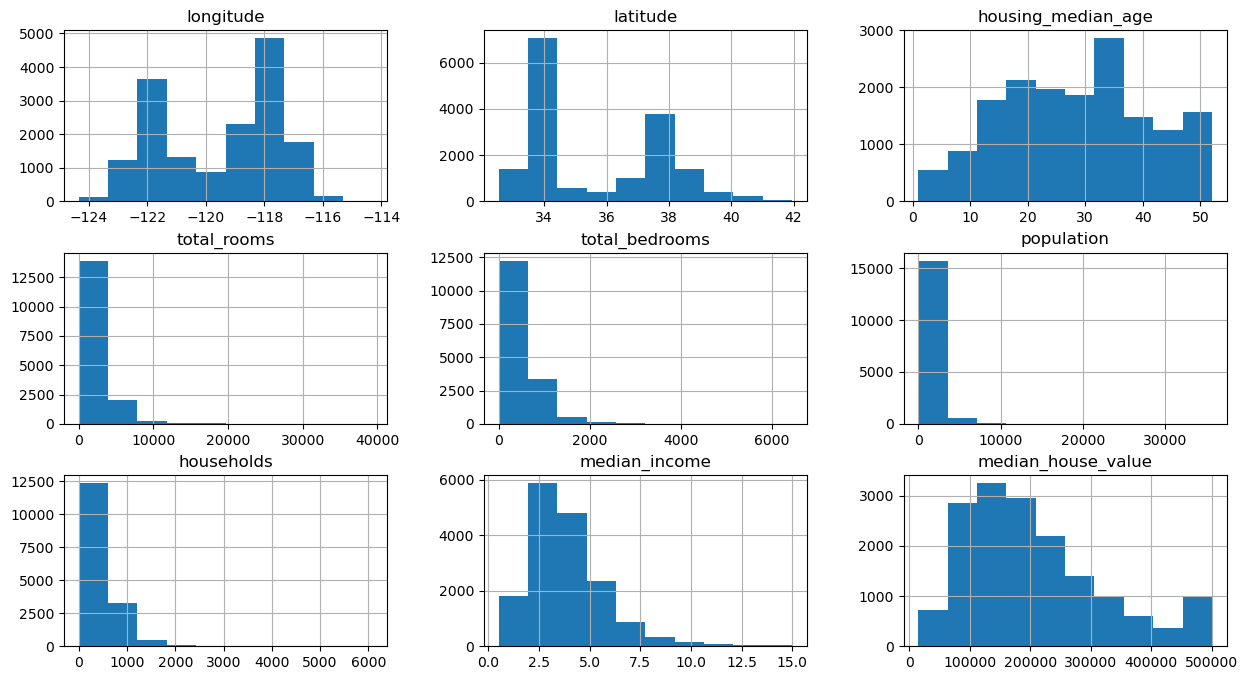

In [62]:
# The .join function is useful as it  allows us to put the randomly selected factors
# and the prices back together
train_data = x_train.join(y_train)

#drawing the histograms 
# figsize = (15,8) makes this image bigger 
train_data.hist(figsize = (15,8))


<Axes: >

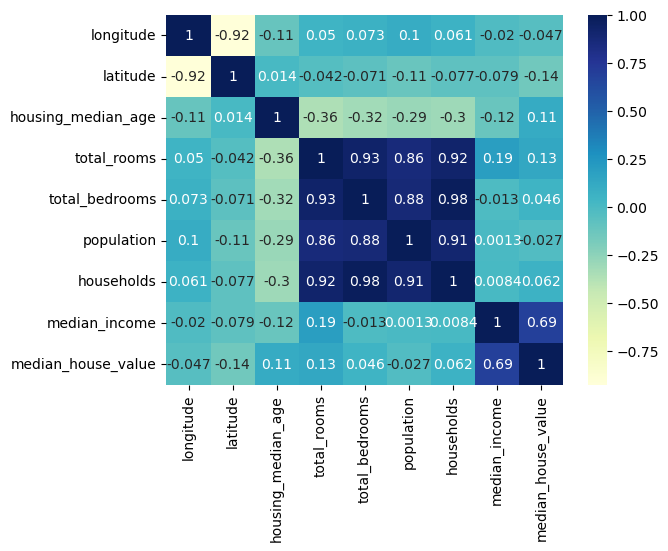

In [68]:
# _training_data.corr()_ dsiplays a table that shows the corelation of the itself and another fator 
# like linear regression with it's own factors 
#train_data.corr()


# sns.heatmap(Helps us draw a heatmap of the corelation matirx
sns.heatmap(train_data.corr(),annot=True, cmap='YlGnBu')
